## Problem Statement:

#### Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings. 

#### The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

#### The bank is looking for help in identifying customers that could show higher intent towards a recommended credit card, given: Customer details (gender, age, region etc.) and Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## 1. Loading data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [3]:
data_train_file = r'C:\Users\AnitaM\Downloads\AnalyticsVidhya\train_s3TEQDk.csv'
data_test_file = r'C:\Users\AnitaM\Downloads\AnalyticsVidhya\test_mSzZ8RL.csv'

In [4]:
cc_train = pd.read_csv(data_train_file)
cc_test = pd.read_csv(data_test_file)

##### Split the train dataset into training and validation datasets (cc_train_train, cc_train_test)

In [5]:
from sklearn.model_selection import train_test_split
cc_train_train, cc_train_test = train_test_split(cc_train, test_size=0.2, random_state=2, stratify=cc_train['Is_Lead'])

## 2. Data Inspection

In [6]:
# Train data at a glance
cc_train_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
164715,K7NZ4BTB,Female,25,RG267,Salaried,X1,14,Yes,606837,No,0
240914,34RYPSY7,Female,28,RG284,Salaried,X1,21,No,2452145,Yes,1
159285,YP9WZRRJ,Male,55,RG277,Self_Employed,X2,85,Yes,746140,No,1
16640,6HC4TJJB,Female,47,RG284,Self_Employed,X2,62,No,1638846,Yes,0
3170,5QSPI6VU,Male,60,RG270,Salaried,X3,93,NaN,376398,No,1


In [7]:
# Validation data at a glance
cc_train_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
121,BYBDRIYT,Female,46,RG276,Self_Employed,X2,81,Yes,694262,No,0
31977,FR9TQU7C,Male,37,RG268,Salaried,X1,25,No,2473737,No,0
119835,L6MXKTPK,Female,45,RG258,Self_Employed,X2,93,No,314695,Yes,0
118455,YUBX9M7F,Male,64,RG272,Salaried,X3,93,Yes,1006349,No,1
16915,8B9WP5BH,Female,37,RG254,Self_Employed,X2,25,Yes,935612,No,0


In [8]:
# Test data at a glance
cc_test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [9]:
# Check the shape of both train and test data
print('Shape of train data: ', cc_train_train.shape)
print('Shape of validation data: ', cc_train_test.shape)
print('Shape of test data: ', cc_test.shape)

Shape of train data:  (196580, 11)
Shape of validation data:  (49145, 11)
Shape of test data:  (105312, 10)


In [10]:
# Check for number of numerical and categorical features in train and test data
print('Numerical features in train : ', cc_train_train.select_dtypes(include=[np.number]).shape[1])
print('Categorical features in train : ', cc_train_train.select_dtypes(exclude=[np.number]).shape[1], '\n')
print('Numerical features in test : ', cc_test.select_dtypes(include=[np.number]).shape[1])
print('Categorical features in test : ', cc_test.select_dtypes(exclude=[np.number]).shape[1])

Numerical features in train :  4
Categorical features in train :  7 

Numerical features in test :  3
Categorical features in test :  7


In [11]:
# Checking for null values in train data
cc_train_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         23479
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [12]:
# Checking for null values in validation data
cc_train_test.isnull().sum()

ID                        0
Gender                    0
Age                       0
Region_Code               0
Occupation                0
Channel_Code              0
Vintage                   0
Credit_Product         5846
Avg_Account_Balance       0
Is_Active                 0
Is_Lead                   0
dtype: int64

In [13]:
# Checking for null values in test data
cc_test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [14]:
# Check the unique number of values in catgorical features and their values in train:
print('The unique number of values for each categorical column are as below: ')
for col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']:
    print(col, cc_train_train[col].nunique())

The unique number of values for each categorical column are as below: 
Gender 2
Region_Code 35
Occupation 4
Channel_Code 4
Credit_Product 2
Is_Active 2


In [15]:
# Check the unique number of values in catgorical features and their values in validation:
print('The unique number of values for each categorical column are as below: ')
for col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']:
    print(col, cc_train_test[col].nunique())

The unique number of values for each categorical column are as below: 
Gender 2
Region_Code 35
Occupation 4
Channel_Code 4
Credit_Product 2
Is_Active 2


In [16]:
# Check the unique number of values in catgorical features and their values in test:
print('The unique number of values for each categorical column are as below: ')
for col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']:
    print(col, cc_test[col].nunique())

The unique number of values for each categorical column are as below: 
Gender 2
Region_Code 35
Occupation 4
Channel_Code 4
Credit_Product 2
Is_Active 2


In [17]:
# Check the values in catgorical features in train:
print('The values for each categorical column are as below: ')
for col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']:
    print(col, ' : ', cc_train_train[col].unique(), '\n')

The values for each categorical column are as below: 
Gender  :  ['Female' 'Male'] 

Region_Code  :  ['RG267' 'RG284' 'RG277' 'RG270' 'RG274' 'RG269' 'RG254' 'RG268' 'RG252'
 'RG272' 'RG250' 'RG280' 'RG265' 'RG283' 'RG281' 'RG262' 'RG279' 'RG257'
 'RG282' 'RG275' 'RG261' 'RG256' 'RG260' 'RG273' 'RG253' 'RG264' 'RG251'
 'RG263' 'RG266' 'RG255' 'RG276' 'RG258' 'RG278' 'RG271' 'RG259'] 

Occupation  :  ['Salaried' 'Self_Employed' 'Other' 'Entrepreneur'] 

Channel_Code  :  ['X1' 'X2' 'X3' 'X4'] 

Credit_Product  :  ['Yes' 'No' nan] 

Is_Active  :  ['No' 'Yes'] 



In [18]:
# Check the values in catgorical features in validation:
print('The values for each categorical column are as below: ')
for col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']:
    print(col, ' : ', cc_train_test[col].unique(), '\n')

The values for each categorical column are as below: 
Gender  :  ['Female' 'Male'] 

Region_Code  :  ['RG276' 'RG268' 'RG258' 'RG272' 'RG254' 'RG270' 'RG260' 'RG283' 'RG273'
 'RG278' 'RG277' 'RG284' 'RG274' 'RG262' 'RG280' 'RG282' 'RG264' 'RG257'
 'RG269' 'RG275' 'RG261' 'RG281' 'RG256' 'RG250' 'RG263' 'RG279' 'RG267'
 'RG252' 'RG251' 'RG253' 'RG265' 'RG271' 'RG255' 'RG259' 'RG266'] 

Occupation  :  ['Self_Employed' 'Salaried' 'Other' 'Entrepreneur'] 

Channel_Code  :  ['X2' 'X1' 'X3' 'X4'] 

Credit_Product  :  ['Yes' 'No' nan] 

Is_Active  :  ['No' 'Yes'] 



In [19]:
# Check the values in catgorical features in test:
print('The values for each categorical column are as below: ')
for col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']:
    print(col, ' : ', cc_test[col].unique(), '\n')

The values for each categorical column are as below: 
Gender  :  ['Male' 'Female'] 

Region_Code  :  ['RG254' 'RG268' 'RG270' 'RG272' 'RG253' 'RG257' 'RG284' 'RG283' 'RG277'
 'RG273' 'RG261' 'RG280' 'RG274' 'RG278' 'RG269' 'RG281' 'RG251' 'RG252'
 'RG279' 'RG282' 'RG262' 'RG263' 'RG264' 'RG256' 'RG265' 'RG260' 'RG258'
 'RG271' 'RG250' 'RG275' 'RG276' 'RG267' 'RG255' 'RG259' 'RG266'] 

Occupation  :  ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'] 

Channel_Code  :  ['X1' 'X2' 'X3' 'X4'] 

Credit_Product  :  ['Yes' nan 'No'] 

Is_Active  :  ['No' 'Yes'] 



In [20]:
# Decribe the numeric features in train:
cc_train_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,196580.000000,196580.000000,1.965800e+05,196580.000000
mean,43.856944,46.979494,1.128749e+06,0.237206
std,14.824772,32.351676,8.522209e+05,0.425371
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.050220e+05,0.000000
50%,43.000000,32.000000,8.952725e+05,0.000000
75%,54.000000,73.000000,1.367104e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [21]:
# Decribe the numeric features in test:
cc_test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [22]:
# There seems to be outliers in Vintage and Avg account balance column (mean and median seem to vary by an amount)

In [23]:
# Check the distribution of output class in target variable
print('Output class distribution in whole train dataset : ')
print(cc_train['Is_Lead'].value_counts(), '\n')

Output class distribution in whole train dataset : 
0    187437
1     58288
Name: Is_Lead, dtype: int64 



## 3. Data cleaning

In [24]:
# Dropping the ID column 
del cc_train_train['ID']
del cc_train_test['ID']

In [25]:
# Check the count for each credit_product value per Is_lead value:
cc_train_train.groupby(['Credit_Product', 'Is_Lead'])['Is_Lead'].count()

Credit_Product  Is_Lead
No              0          106936
                1            8442
Yes             0           39541
                1           18182
Name: Is_Lead, dtype: int64

In [26]:
# Filling the missing values with No as credit_product in train:
cc_train_train['Credit_Product'].fillna('No', inplace=True)
cc_train_train.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [27]:
# Filling the missing values with No as credit_product in validation:
cc_train_test['Credit_Product'].fillna('No', inplace=True)
cc_train_test.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [28]:
# Filling the missing values with No as credit_product in train:
cc_test['Credit_Product'].fillna('No', inplace=True)
cc_test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

## 4. Exploratory Data Analysis

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

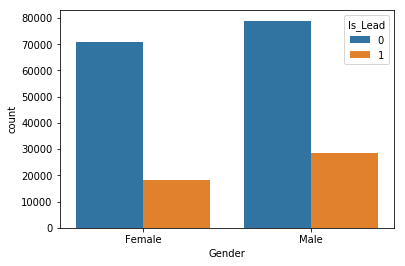

In [30]:
sns.countplot(x='Gender', hue='Is_Lead', data=cc_train_train)

##### Most customers in the given data did not take interest in credit card whether male or female

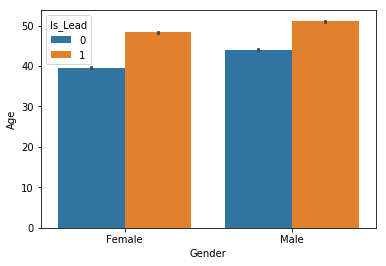

In [31]:
sns.barplot(y='Age', x='Gender', hue='Is_Lead', data=cc_train_train)

##### Customers who were more interested in the credit card are having more age than those who were not interested be it male or female

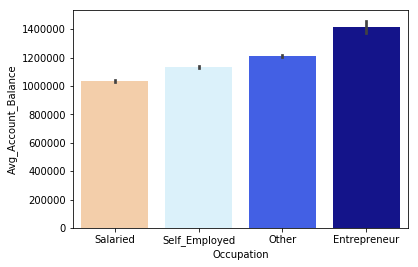

In [32]:
sns.barplot(x='Occupation', y='Avg_Account_Balance', data=cc_train_train, palette='flag')

##### Customers who are Enterpreneurs have more account balance

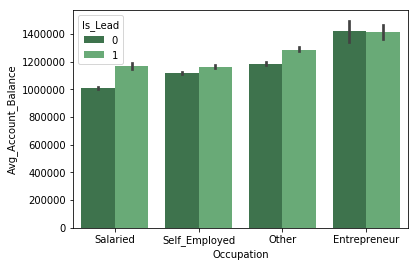

In [33]:
sns.barplot(x='Occupation', y='Avg_Account_Balance', data=cc_train_train, hue='Is_Lead', palette='Greens_d')

##### Salaried customers tend to be more interested in credit card with more account balance as compared to the ones who tend to be not interested 

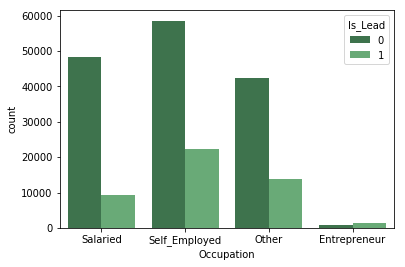

In [34]:
sns.countplot(x='Occupation', data=cc_train_train, hue='Is_Lead', palette='Greens_d')

##### Self Employed customers tend to be the most interested

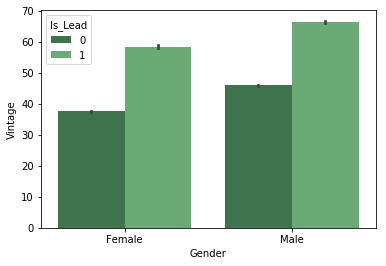

In [35]:
sns.barplot(x='Gender', y='Vintage', hue='Is_Lead', data=cc_train_train, palette='Greens_d')

##### More the Vintage more the customers tend to be interested in credit card and male customers with more vintage seem to be more interested than female customers.

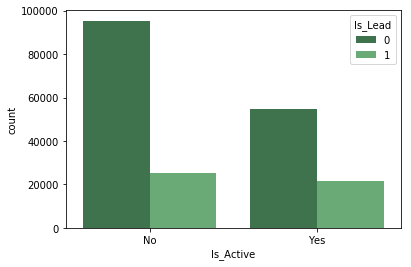

In [36]:
sns.countplot(x='Is_Active', data=cc_train_train, hue='Is_Lead', palette='Greens_d')

##### If the customer has not been active in the last three months there is a high chance that they would not be interested in credit card. The portion of customers who happen to have interest is not much affected by the fact that they have been active in that last three months or not. 

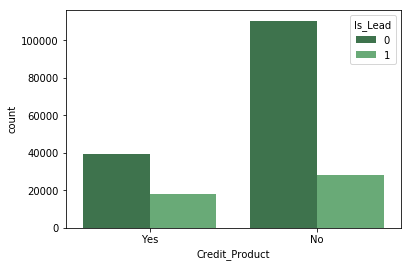

In [37]:
sns.countplot(x='Credit_Product', data=cc_train_train, hue='Is_Lead', palette='Greens_d')

##### If the customer does not  have any active credit product there is a high chance that the customer would not be interest in credit card. The customers who have any active credit product tend to less interested than those who don't have any active credit product.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

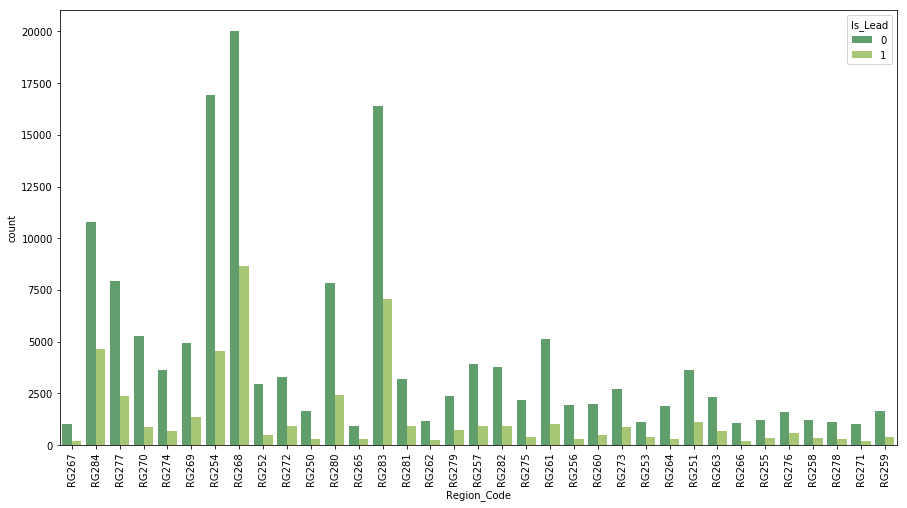

In [38]:
plt.figure(figsize=[15,8])
sns.countplot(x='Region_Code', hue='Is_Lead', data=cc_train_train, palette='summer')
plt.xticks(rotation=90)

##### Customer under region code RG268 have most customers who are not interested followed by RG254 and RG283 and customer under region code RG268 are more interested followed by RG283 and RG284

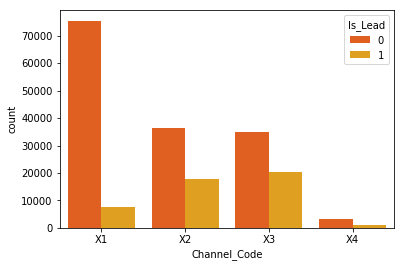

In [39]:
sns.countplot(x='Channel_Code', data=cc_train_train, hue='Is_Lead', palette='autumn')

##### Customers with Acquisition Channel Code X1 tend to be most uninterested and X3 has more number of customers who would be interested. The population under X4 is very less

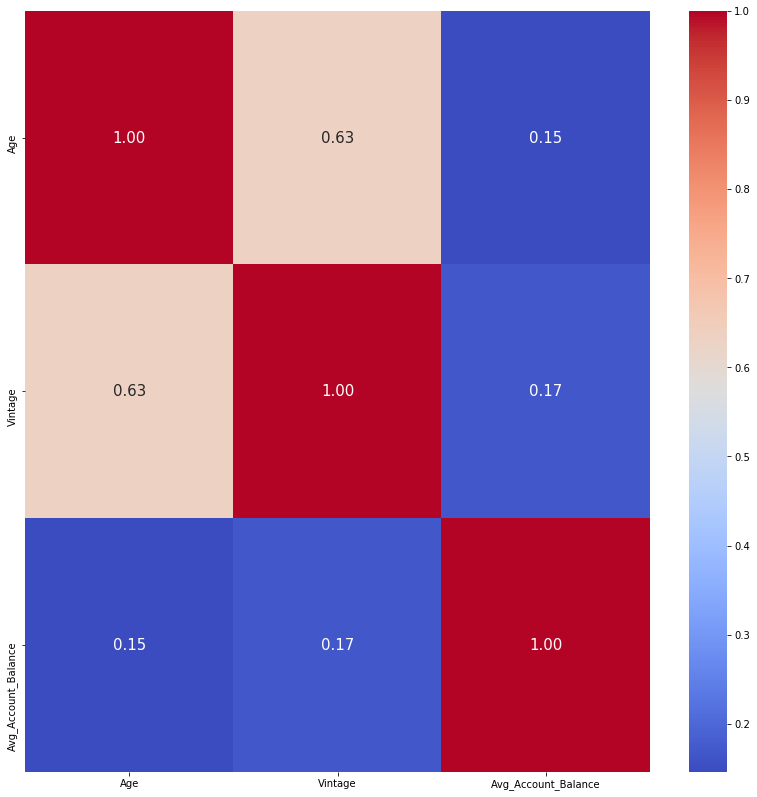

In [40]:
num_data = cc_train_train[['Age', 'Vintage', 'Avg_Account_Balance']]

# Using correlation coefficient to find relation among the numeric features:
corr = num_data.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')

##### Not so much correlation among the numeric features

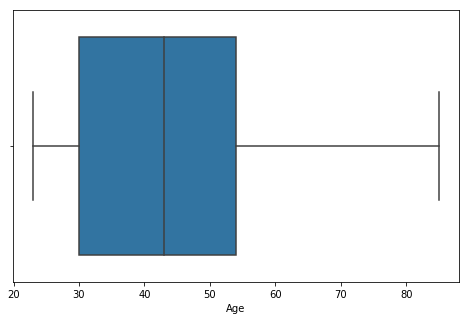

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot('Age',data=cc_train_train)

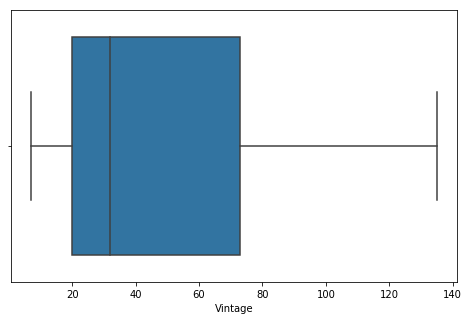

In [42]:
plt.figure(figsize=(8,5))
sns.boxplot('Vintage',data=cc_train_train)

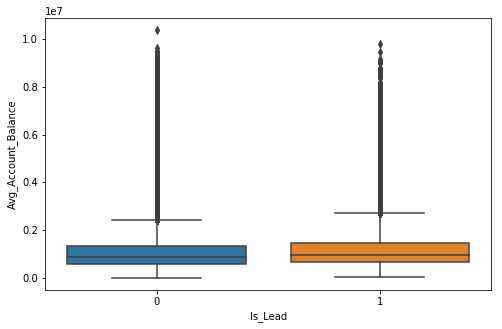

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Is_Lead', y='Avg_Account_Balance', data=cc_train_train)

In [44]:
# Presence of outliers in Avg_Account_Balance column

##### Replacing the outlier points in Account Balance column using 25% and 75% quantile values

In [45]:
#Reset index
cc_train_train.reset_index(drop=True, inplace=True)
cc_train_test.reset_index(drop=True, inplace=True)
cc_test.reset_index(drop=True, inplace=True)

In [46]:
Q1 = cc_train_train['Avg_Account_Balance'].quantile(0.25)
Q3 = cc_train_train['Avg_Account_Balance'].quantile(0.75)
IQR = Q3 - Q1

number = ((cc_train_train['Avg_Account_Balance'] < (Q1 - 1.5 * IQR)) | (cc_train_train['Avg_Account_Balance'] > (Q3 + 1.5 * IQR))).sum()
print('The number of outlier points in this column are = ', number)

for i in range(len(cc_train_train)):
    if cc_train_train['Avg_Account_Balance'][i] < (Q1 - 1.5 * IQR):
        cc_train_train.loc[i, 'Avg_Account_Balance'] = Q1
    if cc_train_train['Avg_Account_Balance'][i] > (Q3 + 1.5 * IQR):
        cc_train_train.loc[i, 'Avg_Account_Balance'] = Q3

The number of outlier points in this column are =  11642


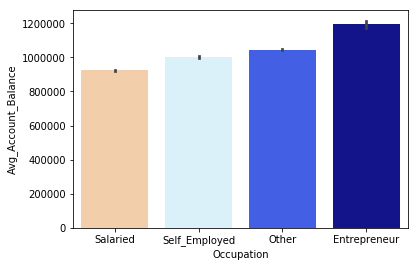

In [47]:
sns.barplot(x='Occupation', y='Avg_Account_Balance', data=cc_train_train, palette='flag')

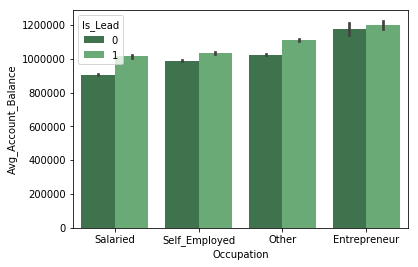

In [48]:
sns.barplot(x='Occupation', y='Avg_Account_Balance', data=cc_train_train, hue='Is_Lead', palette='Greens_d')

In [49]:
# Similar results from before replacing the extreme points

##### Replacing the extreme values in validation dataset

In [50]:
number = ((cc_train_test['Avg_Account_Balance'] < (Q1 - 1.5 * IQR)) | (cc_train_test['Avg_Account_Balance'] > (Q3 + 1.5 * IQR))).sum()
print('The number of outlier points in this column are = ', number)

for i in range(len(cc_train_test)):
    if cc_train_test['Avg_Account_Balance'][i] < (Q1 - 1.5 * IQR):
        cc_train_test.loc[i, 'Avg_Account_Balance'] = Q1
    if cc_train_test['Avg_Account_Balance'][i] > (Q3 + 1.5 * IQR):
        cc_train_test.loc[i, 'Avg_Account_Balance'] = Q3

The number of outlier points in this column are =  2970


##### Replacing outliers in test data

In [51]:
number = ((cc_test['Avg_Account_Balance'] < (Q1 - 1.5 * IQR)) | (cc_test['Avg_Account_Balance'] > (Q3 + 1.5 * IQR))).sum()
print('The number of outlier points in this column are = ', number)

for i in range(len(cc_test)):
    if cc_test['Avg_Account_Balance'][i] < (Q1 - 1.5 * IQR):
        cc_test.loc[i, 'Avg_Account_Balance'] = Q1
    if cc_test['Avg_Account_Balance'][i] > (Q3 + 1.5 * IQR):
        cc_test.loc[i, 'Avg_Account_Balance'] = Q3

The number of outlier points in this column are =  6321


##### Using clustering to group customers using features Age, Vintage and Avg_Account_Balance

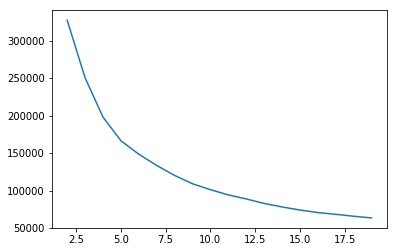

In [51]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

cc_train_train_num = cc_train_train[['Age', 'Vintage', 'Avg_Account_Balance']]
cc_train_train_num=pd.DataFrame(scale(cc_train_train_num),columns=list(cc_train_train_num.columns))

range_n_clusters = range(2,20)
ssw=[]
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=int(k))
    kmeans.fit(cc_train_train_num)
    ssw.append(kmeans.inertia_)
plt.plot(range_n_clusters,ssw)

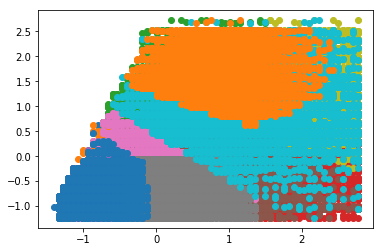

In [52]:
# elbow point at k=12
k = 12
kmeans = KMeans(n_clusters=k)
kmeans.fit(cc_train_train_num)

labels = kmeans.labels_
cc_train_train_num['cluster']=labels

for i in range(k):
    # select only data observations with cluster label == i
    ds = cc_train_train_num[cc_train_train_num['cluster']==i].to_numpy()
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')

plt.show()

In [53]:
cc_train_train['cluster_kmeans'] = cc_train_train_num['cluster']
cc_train_train_lead1 = cc_train_train[cc_train_train['Is_Lead']==1]

pivot_age = cc_train_train_lead1.pivot_table(index='cluster_kmeans', values='Age', aggfunc=np.mean)
pivot_vintg = cc_train_train_lead1.pivot_table(index='cluster_kmeans', values='Vintage', aggfunc=np.mean)
pivot_bal = cc_train_train_lead1.pivot_table(index='cluster_kmeans', values='Avg_Account_Balance', aggfunc=np.mean)

cluster_label_mean = pd.concat([pivot_age, pivot_vintg, pivot_bal], 1)
cluster_label_mean

,Age,Vintage,Avg_Account_Balance
cluster_kmeans,,,
0,47.197067,68.150432,7.288099e+05
1,33.513385,24.076857,1.349513e+06
2,51.892421,95.922962,1.341516e+06
3,69.476337,40.536570,7.989439e+05
4,31.964330,22.198032,4.732013e+05
5,51.917362,42.168614,1.410058e+06
6,38.245130,27.960227,2.031728e+06
7,47.252706,23.382011,6.705258e+05
8,74.538879,91.135322,1.118654e+06


##### Above can be the different customer groups having average age, vintage and account balance values that can be trageted

In [54]:
del cc_train_train['cluster_kmeans']

## 5. Feature Engineering and Model Building

In [52]:
# Displaying the object dtype columns in train and test 
print('Categorical columns in train-----')
for col in cc_train_train.select_dtypes('object'):
    print(col)

print('\n')
    
print('Categorical columns in validation-----')
for col in cc_train_test.select_dtypes('object'):
    print(col)
    
print('\n')
    
print('Categorical columns in test-----')
for col in cc_test.select_dtypes('object'):
    print(col)

Categorical columns in train-----
Gender
Region_Code
Occupation
Channel_Code
Credit_Product
Is_Active


Categorical columns in validation-----
Gender
Region_Code
Occupation
Channel_Code
Credit_Product
Is_Active


Categorical columns in test-----
ID
Gender
Region_Code
Occupation
Channel_Code
Credit_Product
Is_Active


In [53]:
# Creating dummies for these categorical features

# TRAIN:
for col in ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']:
    temp_dummies = pd.get_dummies(cc_train_train[col], drop_first=True, prefix=col)
    cc_train_train = pd.concat([temp_dummies, cc_train_train], 1)
    cc_train_train.drop([col], 1, inplace=True)
    
# VALIDATION:
for col in ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']:
    temp_dummies = pd.get_dummies(cc_train_test[col], drop_first=True, prefix=col)
    cc_train_test = pd.concat([temp_dummies, cc_train_test], 1)
    cc_train_test.drop([col], 1, inplace=True)
    
#TEST:
for col in ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']:
    temp_dummies = pd.get_dummies(cc_test[col], drop_first=True, prefix=col)
    cc_test = pd.concat([temp_dummies, cc_test], 1)
    cc_test.drop([col], 1, inplace=True)

Created dummies seperately to avoid memory error

In [54]:
temp_dummies = pd.get_dummies(cc_train_train['Region_Code'], drop_first=True, prefix='Region_Code')
cc_train_train = pd.concat([temp_dummies, cc_train_train], 1)
del cc_train_train['Region_Code']

temp_dummies = pd.get_dummies(cc_train_test['Region_Code'], drop_first=True, prefix='Region_Code')
cc_train_test = pd.concat([temp_dummies, cc_train_test], 1)
del cc_train_test['Region_Code']

temp_dummies = pd.get_dummies(cc_test['Region_Code'], drop_first=True, prefix='Region_Code')
cc_test = pd.concat([temp_dummies, cc_test], 1)
del cc_test['Region_Code']

In [55]:
cc_train_train.head()

,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,...,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Male,Age,Vintage,Avg_Account_Balance,Is_Lead
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,25,14,606837.0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,28,21,2452145.0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,55,85,746140.0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,47,62,1638846.0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,60,93,376398.0,1


In [56]:
cc_train_test.head()

,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,...,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Male,Age,Vintage,Avg_Account_Balance,Is_Lead
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,46,81,694262.0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,37,25,2473737.0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,45,93,314695.0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,64,93,1006349.0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,37,25,935612.0,0


In [57]:
cc_test.head()

,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,...,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Male,ID,Age,Vintage,Avg_Account_Balance
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,VBENBARO,29,25,742366.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,CCMEWNKY,43,49,925537.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,VK3KGA9M,31,14,215949.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,TT8RPZVC,29,33,868070.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,SHQZEYTZ,29,19,657087.0


In [58]:
# Standardize the data using Standard Scaler:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_features = ['Age', 'Vintage', 'Avg_Account_Balance']

scaler.fit(cc_train_train[num_features])
scaled_train_train = scaler.transform(cc_train_train[num_features])

for i,col in enumerate(num_features):
    cc_train_train[col] = scaled_train_train[:,i]

scaled_train_test = scaler.transform(cc_train_test[num_features])
for i,col in enumerate(num_features):
    cc_train_test[col] = scaled_train_test[:,i]

scaled_test = scaler.transform(cc_test[num_features])
for i,col in enumerate(num_features):
    cc_test[col] = scaled_test[:,i]

In [59]:
# Rescaling the values between 0,1 range using MinMaxScaler:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_features = ['Age', 'Vintage', 'Avg_Account_Balance']

scaler.fit(cc_train_train[num_features])
scaled_train_train = scaler.transform(cc_train_train[num_features])

for i,col in enumerate(num_features):
    cc_train_train[col] = scaled_train_train[:,i]

scaled_train_test = scaler.transform(cc_train_test[num_features])
for i,col in enumerate(num_features):
    cc_train_test[col] = scaled_train_test[:,i]

scaled_test = scaler.transform(cc_test[num_features])
for i,col in enumerate(num_features):
    cc_test[col] = scaled_test[:,i]

In [60]:
cc_train_train.head()

,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,...,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Male,Age,Vintage,Avg_Account_Balance,Is_Lead
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.032258,0.054688,0.235454,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.080645,0.109375,0.976836,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0.516129,0.609375,0.291421,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.387097,0.429688,0.650080,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.596774,0.671875,0.142871,1


In [61]:
cc_train_test.head()

,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,...,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Male,Age,Vintage,Avg_Account_Balance,Is_Lead
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.370968,0.578125,0.270578,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.225806,0.140625,0.985511,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0.354839,0.671875,0.118081,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0.661290,0.671875,0.395964,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0.225806,0.140625,0.367545,0


In [62]:
cc_test.head()

,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,...,Channel_Code_X3,Channel_Code_X4,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Male,ID,Age,Vintage,Avg_Account_Balance
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,VBENBARO,0.096774,0.140625,0.289905
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,CCMEWNKY,0.322581,0.328125,0.363497
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,VK3KGA9M,0.129032,0.054688,0.078408
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,TT8RPZVC,0.096774,0.203125,0.340408
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,SHQZEYTZ,0.096774,0.093750,0.255643


##### Importing libraries to train different models and validate

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [64]:
x_train = cc_train_train.drop('Is_Lead', 1)
y_train = cc_train_train['Is_Lead']

x_test = cc_train_test.drop('Is_Lead', 1)
y_test = cc_train_test['Is_Lead']

In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreesClassifier(), XGBClassifier(), 
          SVC(), KNeighborsClassifier(), MultinomialNB(), MLPClassifier()]

names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'ExtraTrees', 'XGB', 'SVM', 'KNN', 'NB', 'NeuralNetwork']
for model, name in zip(models, names):
    print(name)
    print('Cross Validation ROC AUC Score : ', cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=10).mean())
    model.fit(x_train, y_train)
    print(classification_report(y_train, model.predict(x_train)))
    print(classification_report(y_test, model.predict(x_test)))
    print('Train ROC AUC Score : ', roc_auc_score(y_train,model.predict_proba(x_train)[:,1]))
    print('Test ROC AUC Score : ', roc_auc_score(y_test,model.predict_proba(x_test)[:,1]), '\n')

Logistic Regression
Cross Validation ROC AUC Score :  0.7328174052420888
              precision    recall  f1-score   support

           0       0.78      0.98      0.87    149844
           1       0.66      0.12      0.21     46736

    accuracy                           0.78    196580
   macro avg       0.72      0.55      0.54    196580
weighted avg       0.75      0.78      0.71    196580

              precision    recall  f1-score   support

           0       0.78      0.98      0.87     37593
           1       0.64      0.12      0.21     11552

    accuracy                           0.78     49145
   macro avg       0.71      0.55      0.54     49145
weighted avg       0.75      0.78      0.71     49145

Train ROC AUC Score :  0.733208627566644
Test ROC AUC Score :  0.7334420125623081 

Decision Tree
Cross Validation ROC AUC Score :  0.6096164553038712
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149844
           1 

In [68]:
xgb_model = XGBClassifier(learning_rate=0.1,n_estimators=100,random_state=2)

In [69]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
print('Train ROC AUC Score : ', roc_auc_score(y_train,xgb_model.predict_proba(x_train)[:,1]))
print('Test ROC AUC Score : ', roc_auc_score(y_test,xgb_model.predict_proba(x_test)[:,1]))

Train ROC AUC Score :  0.7985841298017917
Test ROC AUC Score :  0.7844576123725864


In [73]:
#predictions = (xgb_model.predict_proba(cc_test.drop(['ID'],1))[:,1])
#predictions

array([0.0282427 , 0.24744625, 0.06467762, ..., 0.530649  , 0.46984884,
       0.08313283], dtype=float32)

In [74]:
#submission=pd.DataFrame(list(zip(cc_test['ID'],list(predictions))),
#                       columns=['ID','Is_Lead'])
#submission.to_csv('submission_xgb.csv',index=False)

In [80]:
xgb_params = {'learning_rate' : [0.01,0.05,0.1,0.2,0.3],
              'gamma' : [i/10.0 for i in range(0,5)],
              'max_depth' : [2,3,4,5,6,7,8],
              'min_child_weight' : [1,2,5],
              'subsample' : [i/10.0 for i in range(5,10)],
              'colsample_bytree' : [i/10.0 for i in range(5,10)],
              'colsample_bylevel' : [i/10.0 for i in range(5,10)],
              'reg_lambda' : [1e-5, 1e-2, 0.1, 1, 100], 
              'reg_alpha' : [1e-5, 1e-2, 0.1, 1, 100],
              'n_estimator' : [100,300,500,700]
             }

In [79]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'),
                                   cv=5, n_iter=60,
                                   scoring='roc_auc',
                                   random_state=2,
                                   param_distributions=xgb_params)

In [81]:
random_search.fit(x_train,y_train)

[10:56:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:57:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:57:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:02:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:02:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:02:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:08:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:18:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:18:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:19:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:26:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:27:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:27:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:35:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:36:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:36:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:43:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:44:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:44:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:50:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:51:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:51:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[11:57:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:58:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:58:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[12:06:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:06:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:07:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[12:16:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:16:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:16:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[12:27:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:27:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:27:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[12:37:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:38:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:38:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

[12:48:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:48:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:48:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in langu

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                   param_distributions={'colsample_bylevel': [0.5, 0.6, 0.7,
                                                              0.8, 0.9],
                               

In [82]:
xgb_model1 = random_search.best_estimator_

In [83]:
print('Train ROC AUC Score : ', roc_auc_score(y_train,xgb_model1.predict_proba(x_train)[:,1]))
print('Test ROC AUC Score : ', roc_auc_score(y_test,xgb_model1.predict_proba(x_test)[:,1]))

Train ROC AUC Score :  0.7973020178933046
Test ROC AUC Score :  0.7861782340163049


In [65]:
# Hyper tunning XGB model gives a similar performing model

#### Better scores are from XGB model
#### Cross val scores of SVM and KNN trained on smaller sample of data: 0.6952528553128446, 0.6587518466718668 and 
#### Cross val score of Naive Bayes model on smaller representative of the data is 0.6586704055050483

##### Using Random Forest Model to select features

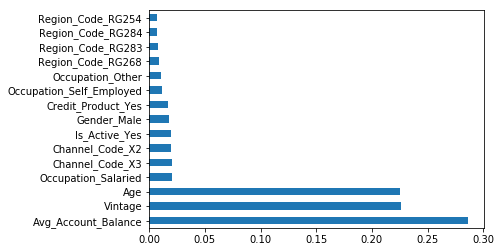

Avg_Account_Balance         0.286155
Vintage                     0.225912
Age                         0.225553
Occupation_Salaried         0.020668
Channel_Code_X3             0.020655
Channel_Code_X2             0.019452
Is_Active_Yes               0.019436
Gender_Male                 0.017615
Credit_Product_Yes          0.016819
Occupation_Self_Employed    0.011887
Occupation_Other            0.010949
Region_Code_RG268           0.008904
Region_Code_RG283           0.008034
Region_Code_RG284           0.007376
Region_Code_RG254           0.006783
dtype: float64


In [66]:
rf_sample = RandomForestClassifier()
rf_sample.fit(x_train, y_train)
feat_imp = pd.Series(rf_sample.feature_importances_, index=x_train.columns)

df_imp_feat = feat_imp.nlargest(15)

df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

##### Using XGB model to select features

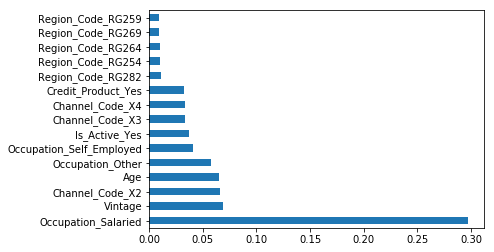

Occupation_Salaried         0.297204
Vintage                     0.068900
Channel_Code_X2             0.066053
Age                         0.065229
Occupation_Other            0.057372
Occupation_Self_Employed    0.040569
Is_Active_Yes               0.036993
Channel_Code_X3             0.033851
Channel_Code_X4             0.033751
Credit_Product_Yes          0.032468
Region_Code_RG282           0.011019
Region_Code_RG254           0.010017
Region_Code_RG264           0.009954
Region_Code_RG269           0.009596
Region_Code_RG259           0.009171
dtype: float32


In [67]:
xgb_sample = XGBClassifier()
xgb_sample.fit(x_train, y_train)
feat_imp = pd.Series(xgb_sample.feature_importances_, index=x_train.columns)

df_imp_feat = feat_imp.nlargest(15)

df_imp_feat.plot(kind='barh')
plt.show()
print(df_imp_feat)

##### Using the above selected features from Random Forest and training the prev XGB model

In [68]:
x_train_imp_ft = x_train[['Avg_Account_Balance', 'Vintage', 'Age', 'Occupation_Salaried', 'Channel_Code_X3', 'Channel_Code_X2',
                          'Is_Active_Yes', 'Gender_Male', 'Credit_Product_Yes', 'Occupation_Self_Employed', 'Occupation_Other',
                          'Region_Code_RG268', 'Region_Code_RG283', 'Region_Code_RG284', 'Region_Code_RG254']]

xgb_model = XGBClassifier(learning_rate=0.1,n_estimators=100,random_state=2)
xgb_model.fit(x_train_imp_ft, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [70]:
x_test_imp_ft = x_test[['Avg_Account_Balance', 'Vintage', 'Age', 'Occupation_Salaried', 'Channel_Code_X3', 'Channel_Code_X2',
                          'Is_Active_Yes', 'Gender_Male', 'Credit_Product_Yes', 'Occupation_Self_Employed', 'Occupation_Other',
                          'Region_Code_RG268', 'Region_Code_RG283', 'Region_Code_RG284', 'Region_Code_RG254']]

print('Train ROC AUC Score : ', roc_auc_score(y_train,xgb_model.predict_proba(x_train_imp_ft)[:,1]))
print('Test ROC AUC Score : ', roc_auc_score(y_test,xgb_model.predict_proba(x_test_imp_ft)[:,1]))

Train ROC AUC Score :  0.7975227108013774
Test ROC AUC Score :  0.7843058733741256


##### Hypertunning XGB with these selected features

In [73]:
from sklearn.model_selection import RandomizedSearchCV

xgb_params = {'learning_rate' : [0.01,0.05,0.1,0.2,0.5,1],
              'max_depth' : [5,8,10,15],
              'n_estimators' : [100,250,300,350,500,700]
             }

random_search = RandomizedSearchCV(XGBClassifier(objective='binary:logistic'),
                                   cv=5,
                                   scoring='roc_auc',
                                   random_state=2,
                                   param_distributions=xgb_params)

random_search.fit(x_train_imp_ft, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [74]:
xgb_final = random_search.best_estimator_

In [75]:
print('Train ROC AUC Score : ', roc_auc_score(y_train,xgb_final.predict_proba(x_train_imp_ft)[:,1]))
print('Test ROC AUC Score : ', roc_auc_score(y_test,xgb_final.predict_proba(x_test_imp_ft)[:,1]))

Train ROC AUC Score :  0.7891336644704714
Test ROC AUC Score :  0.7820808691806435


In [76]:
cc_test_imp_ft = cc_test[['Avg_Account_Balance', 'Vintage', 'Age', 'Occupation_Salaried', 'Channel_Code_X3', 'Channel_Code_X2',
                          'Is_Active_Yes', 'Gender_Male', 'Credit_Product_Yes', 'Occupation_Self_Employed', 'Occupation_Other',
                          'Region_Code_RG268', 'Region_Code_RG283', 'Region_Code_RG284', 'Region_Code_RG254']]

predictions = (xgb_final.predict_proba(cc_test_imp_ft)[:,1])
submission=pd.DataFrame(list(zip(cc_test['ID'],list(predictions))),
                       columns=['ID','Is_Lead'])
submission.to_csv('submission_xgb.csv',index=False)

##### Trying HyperOpt paremeter tuning for Random forest method with selected features from Random forest

In [77]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

rf_params = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,10)),
    'n_estimators': hp.choice('n_estimators', [50,100,150,200,300,500]),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])}

def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, x_train_imp_ft, y_train, scoring='roc_auc').mean()

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, rf_params, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
print (best)

new best:                                                                      
0.7797897898198534                                                             
{'criterion': 'gini', 'max_depth': 11, 'max_features': 1, 'n_estimators': 100} 
new best:                                                                      
0.7797897898198534                                                             
{'criterion': 'entropy', 'max_depth': 18, 'max_features': 6, 'n_estimators': 50}
new best:                                                                      
0.7822496633197555                                                             
{'criterion': 'gini', 'max_depth': 9, 'max_features': 3, 'n_estimators': 500}  
new best:                                                                      
0.7822496633197555                                                             
{'criterion': 'gini', 'max_depth': 17, 'max_features': 8, 'n_estimators': 100} 
new best:                              

In [80]:
rf_model = RandomForestClassifier(**{'criterion': 'entropy', 'max_depth': 10, 'max_features': 7, 'n_estimators': 100})
rf_model.fit(x_train_imp_ft, y_train)

print('Train ROC AUC Score : ', roc_auc_score(y_train, rf_model.predict(x_train_imp_ft)))
print('Test ROC AUC Score : ', roc_auc_score(y_test, rf_model.predict(x_test_imp_ft)))

Train ROC AUC Score :  0.608203513688207
Test ROC AUC Score :  0.598668621545765


##### Trying a neural network classifier

In [81]:
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)

print('Cross Validation ROC AUC Score : ', cross_val_score(mlp_model, x_train, y_train, scoring='roc_auc', cv=10).mean())
print(classification_report(y_train, mlp_model.predict(x_train)))
print(classification_report(y_test, mlp_model.predict(x_test)))
print('Train ROC AUC Score : ', roc_auc_score(y_train, mlp_model.predict_proba(x_train)[:,1]))
print('Test ROC AUC Score : ', roc_auc_score(y_test, mlp_model.predict_proba(x_test)[:,1]), '\n')

Cross Validation ROC AUC Score :  0.7808509441670349
              precision    recall  f1-score   support

           0       0.81      0.96      0.88    149950
           1       0.70      0.26      0.38     46630

    accuracy                           0.80    196580
   macro avg       0.75      0.61      0.63    196580
weighted avg       0.78      0.80      0.76    196580

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     37487
           1       0.64      0.24      0.35     11658

    accuracy                           0.79     49145
   macro avg       0.72      0.60      0.61     49145
weighted avg       0.76      0.79      0.75     49145

Train ROC AUC Score :  0.8004991968514488
Test ROC AUC Score :  0.7763957554350529 

